<a href="https://colab.research.google.com/github/sankar82/sankara/blob/main/03_pytorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What is a Computer Vision problem and what are we going to cover?

### What is a computer vision problem?

* panoptic segmentation for camera using Transformers - https://machinelearning.apple.com/research/panoptic-segmentation

* what can computer vision be used for - object detection and classification (e.g., road sign, traffic lights), create 3D maps, motion estimation, autonomous vehicles, facial recognition, medical anomaly detection, https://www.v7labs.com/blog/computer-vision-applications

## What are we going to cover?
* Getting a vision dataset to work with using torchvision.datasets
* Architecture of a convolutional neural network (CNN) with PyTorch
* An end-to-end multi-class image classification problem
* Steps in modellig with CNN PyTorch
  * Creating a CNN model with PyTorch
  * Picking a loss fn and an optimizer
  * Training a PyTorch computer vision model
  * Evaluating a model

## Computer Vision Input and Output Shapes

CNN has been traditonally used with image data. But now Transformers are used and they perform very well.

Shape = [batch_size,height,width,colour channels]

Shape = [None,224,224,3]
Shape = [32,224,224,3]

PyTorch defaults to colour channels first. But many libraries only accept colour channels last.



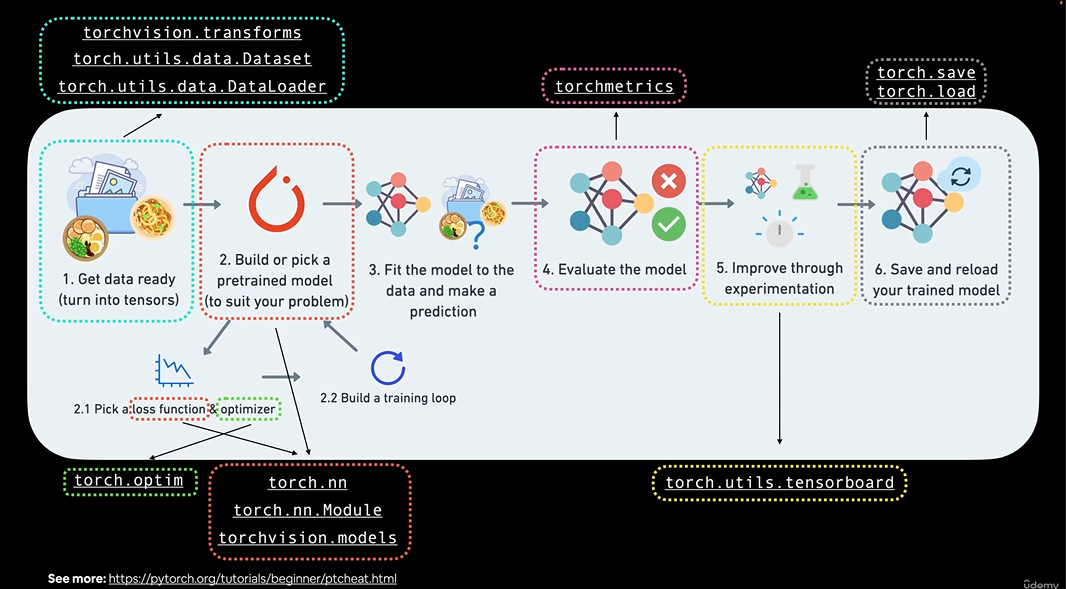

## What is a convolutional neural network (CNN)?

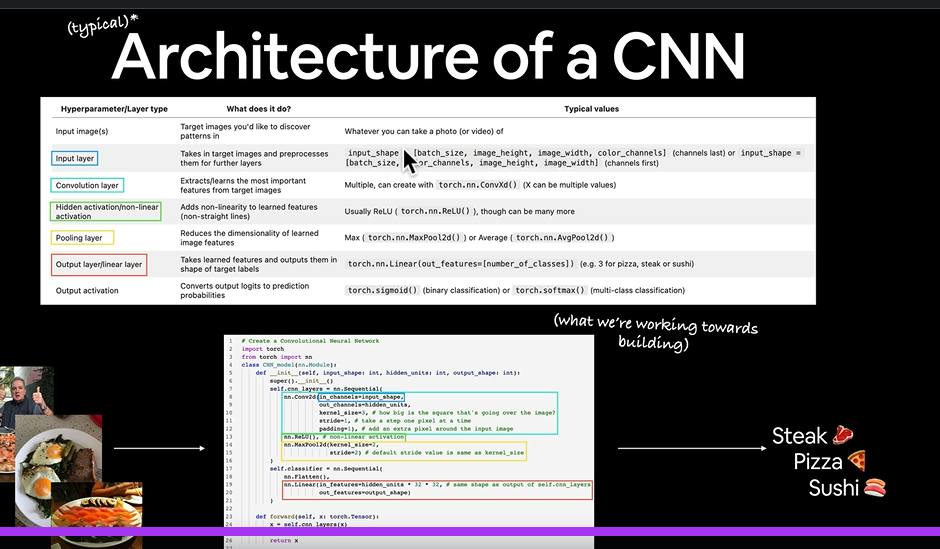

## Discussing and Importing Base Computer Vision Libraries in PyTorch

### 0. Computer vision libraries in PyTorch

* [`torchvision`](https://pytorch.org/vision/stable/index.html) - base domain library for PyTorch computer vision
* `torchvision.datasets` - get datasets and data loading functions for computer vision here
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems
* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with an ML model
* `torch.utils.data.Dataset` - Base dataset class for PyTorch
* `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset

In [ ]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
# ToTensor - Convert a PIL Image or ndarray to tensor and scale the values accordingly.
# https://pytorch.org/vision/stable/transforms.html

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

2.0.1+cu118
0.15.2+cu118


## Getting a Computer Vision Dataset and Checking out its Input and Output Shapes

### 1. Getting a dataset

The dataset we'll be using is FashionMIST from torchvision.datasets
https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST

In [ ]:
# Set up training data
train_data = datasets.FashionMNIST( # Since we already imported torchvision.datasets
    root = 'data', # Where to download data to?
    train=True, # do we want the training dataset?
    download=True, # do we want to download?
    transform=torchvision.transforms.ToTensor(), # how do we want to transform the data? We can also say ToTensor.
    target_transform=None # how do we want to transform the labels/target?
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [ ]:
len(train_data),len(test_data)

(60000, 10000)

ToTensor - Converts a PIL Image or numpy.ndarray (H x W x C) in the range [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0]
https://pytorch.org/vision/stable/generated/torchvision.transforms.ToTensor.html

In [ ]:
image,label = train_data[0]
image,label
# This is a 3D matrix of shape (1,28,28). That is 1 3D matrix with a 2D matrix of shape 28x28
# Note 9 indicates the label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
train_data, test_data, type(train_data), type(train_data[0])
# Each item in train_data is a tuple of a 3D matrix and a scalar value for label

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor(),
 torchvision.datasets.mnist.FashionMNIST,
 tuple)

In [ ]:
type(image), type(label)

(torch.Tensor, int)

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

### 1.1 Check input and output shapes of data

In [ ]:
# Chcck the shape of our image
print(f"Image shape: {image.shape}-> [color channels, height, width]")
print(f"Image label: {class_names[label]}")
# image.ndim,image.shape,label
# colour channel is 1 because it is B/W image. B - 0 and W - 1 and other values are inbetween

Image shape: torch.Size([1, 28, 28])-> [color channels, height, width]
Image label: Ankle boot


## Visualizing Random Samples of Data

### 1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


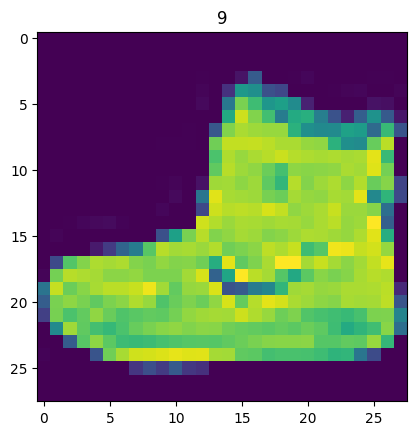

In [ ]:
import matplotlib.pyplot as plt
image,label = train_data[0] # Tuple unpacking
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
# This throws an error because matplotlib expects only height and width or colour channel at the last
plt.title(label);

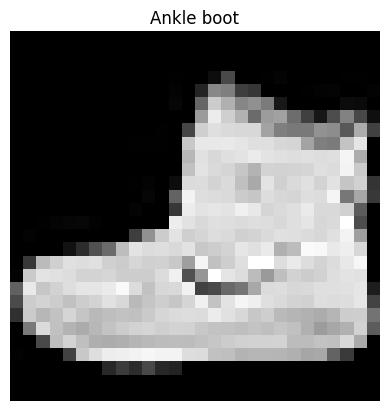

In [ ]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False);

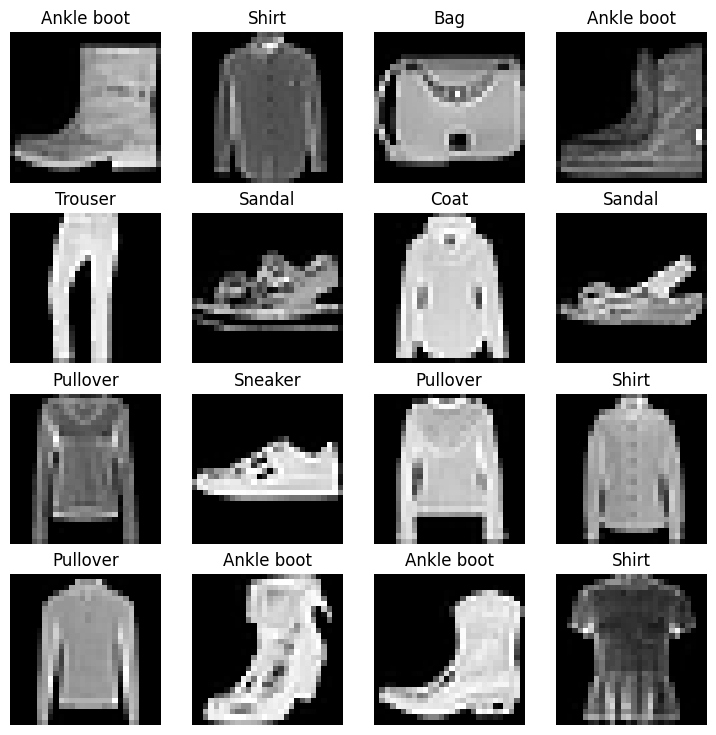

In [ ]:
# Plot more images randomly to have a look at the data
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows,cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0,len(train_data),size=[1]).item()
  img,label = train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)



## DataLoader Overview - Understanding Mini Batches

### 2. Prepare DataLoader

Right now our data is in the form of PyTorch Datasets.

DataLoader turns our dataset into Python iterable.

More specifically, we want to turn our data into batches (or mini-batches)

Why would we do this?

1. It is more computanionally efficient, as in, your computing hardware may not be able to look (store in menory) 60000 images at one go. So we break it down into 32 images at a time (batch size of 32)
2. It gives our neural network more chances to update its gradients per epoch


## Turning our Datasets into DataLoaders

In [ ]:
# Turn train dataset into DataLoader
from torch.utils.data import DataLoader

# Set up the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

# Turn test dataset into DataLoader
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader
# https://pytorch.org/tutorials/beginner/basics/data_tutorial.html
# https://pytorch.org/docs/stable/data.html (Spend some time and go through this )

(<torch.utils.data.dataloader.DataLoader at 0x7f6321ebdc30>,
 <torch.utils.data.dataloader.DataLoader at 0x7f6322288880>)

In [ ]:
# Let's check out what we've created
print(f"DataLoader: {train_dataloader,test_dataloader}")
print(f"Length of train data_loader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test data_loader: {len(test_dataloader)} batches of {BATCH_SIZE}")

DataLoader: (<torch.utils.data.dataloader.DataLoader object at 0x7f6321ebdc30>, <torch.utils.data.dataloader.DataLoader object at 0x7f6322288880>)
Length of train data_loader: 1875 batches of 32
Length of test data_loader: 313 batches of 32


In [ ]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape


(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 8, label size: torch.Size([])


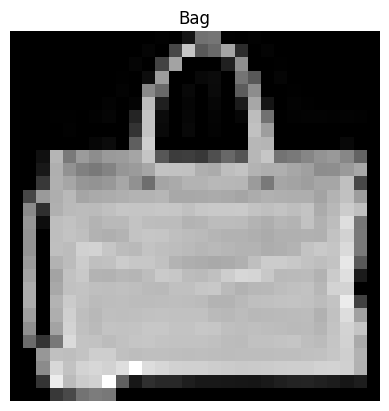

In [ ]:
# Show a random sample from the batch
# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch),size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis("off")
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## Model 0: Creating a Baseline Model with Two Linear Layers

### 3. Model 0: Build a baseline model

When starting to build a series of machine learning modelling experiments, it's best practice to start with a baseline model.

A baseline model is a simple model we will try and improve upon with subsequent models/experiments.

In other word: Start simple and add complexity when necessary.



In [ ]:
# Create a flatten layer
flatten_model = nn.Flatten() # https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # Perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape}")
print(f"Shape after flattening: {output.shape}")


Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [ ]:
type(x)

torch.Tensor

In [ ]:
output.squeeze()

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0000, 0.0000, 0.0078, 0.0078,
        0.0000, 0.0000, 0.0039, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.2863, 0.0000, 0.0000, 0.0078, 

In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # flatten inputs into a single vectorS
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self,x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=784, # this is 28*28
    hidden_units=10, # No of units in the hidden layer
    output_shape=len(class_names) # one for every class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)
# This gives an output of 10 logits, one logit value per class

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

If we don't flatten, there is shape mismatch error.

But if we remove `flatten()`, and change input shape to 28, it gives an output of shape (1,1,28,10). We don't want this. We only want one output per class.

**Imp Note:** Read the documentation to see what input shape certain layers expect

## Creating a Loss function and Optimizer for Model_0

### 3.1 Setup loss, optimizer and evaluation metrics

* Loss function - Since we are working with multi-class data, our loss function will be `nn.CrossEntropyLoss()`
* Optimizer - our optimizer is `torch.optim.SGD`
* Evaluation metric - since we're working on a classification problem, let's use accuracy as evaluation metric

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download...")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download...


In [ ]:
# Import accuracy metric
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)


## Creating a Function to Time our Modelling code

### 3.2 Creating a function to time our experiments

Machine learning is very experimental.

Two of the main things you'll often want to track are:
1. Model's performance (loss and accuracy values etc)
2. How fast it runs

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device=None):
  """ Prints the difference between start and end time"""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [ ]:
start_time = timer()
# some code..
end_time = timer()
print_train_time(start=start_time,end=end_time,device="cpu")

Train time on cpu: 0.000 seconds


3.7815999803569866e-05

## Writng Training and Testing Loops for Our Batched Data

### 3.3 Creating a training loop and training the model on batches of data

The steps are slightly different to what we did earlier

1. Loop through epochs
2. Loop through training batches, perform training steps, calculate the train loss *per batch.*
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch.*
4. Print out what's happening
5. Time it all

In [ ]:
# Import tqdm for progress bar https://github.com/tqdm/tqdm
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")
  # Training
  train_loss = 0 # To calculate the training loss per batch, we initialize to 0 and then add
  # Add a loop to loop through the training batches
  for batch, (X,y) in enumerate(train_dataloader): # We could also say (X_train,y_train) like we do in test or (image, label)
    model_0.train()
    # 1. Forward pass
    y_pred = model_0(X)

    # 2. Calculate the loss (per batch)
    loss = loss_fn(y_pred,y)
    train_loss+= loss # accumulate train loss

    # 3. Optimize zero grad
    optimizer.zero_grad()

    # 4. Loss backward (backpropagation)
    loss.backward()

    #5. Optimizer step (gradient descent)
    optimizer.step() # We're updating our model's parameters once per batch rather than wait for it to see all 60k images

    # 6. Print out what's happening
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)} / {len(train_dataloader.dataset)} samples")

  # Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader) # This means train_loss = train_loss / len(train_dataloader)

  ## Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader: # Note we don't say batch, (X,y) here as we don't need to keep track of batches
      # 1. Forward pass
      test_pred = model_0(X_test) # The raw output from this is logits

      # 2. Calculate the loss accumulatively
      test_loss+= loss_fn(test_pred,y_test) # We are doing this in a single step

      # 3. Calculate accuracy
      test_acc += accuracy_fn(y_true=y_test,y_pred=test_pred.argmax(dim=1)) # Since test_pred is logits, we need to use argmax.

    # Calculate the test loss average per batch
    test_loss/= len(test_dataloader) # This means test_loss = test_loss / len(train_dataloader)

    # Calculate the test acc average per batch
    test_acc/= len(test_dataloader)

  # Print out what's happening
  print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f} ")

# Calculate the training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))






  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train loss: 0.5904 | Test loss: 0.5095, Test acc: 82.0387 
Epoch: 1
------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train loss: 0.4763 | Test loss: 0.4799, Test acc: 83.1969 
Epoch: 2
------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train loss: 0.4550 | Test loss: 0.4766, Test acc: 83.4265 
Train time on cpu: 44.538 seconds


In [ ]:
len(train_dataloader), len(train_dataloader.dataset)

(1875, 60000)

In [ ]:
next(model_0.parameters())

Parameter containing:
tensor([[ 0.0273,  0.0298, -0.0065,  ...,  0.0071,  0.0091,  0.0170],
        [-0.0189, -0.0355,  0.0155,  ...,  0.0161,  0.0120,  0.0117],
        [-0.0008,  0.0020,  0.0032,  ...,  0.0058, -0.0146,  0.0084],
        ...,
        [-0.0116,  0.0274, -0.0323,  ...,  0.0527,  0.0434,  0.0006],
        [-0.0231,  0.0252,  0.0236,  ..., -0.0892, -0.0385, -0.0071],
        [ 0.0175, -0.0148,  0.0027,  ..., -0.1155, -0.0674,  0.0125]],
       requires_grad=True)

## Writing an Evaluation Function to Get Our Model's Results

### 4. Make predictions and get Model 0 results

In [ ]:
# Setup device-agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
  """ Returns a dictionary containing the results of model predicting on data_loader"""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      # Make our data device agnostic
      #X,y = X.to(device), y.to(device)
      # Make predictions (Forward pass)
      y_pred = model(X) # We don't have to specify what model it is

      # Accumulate the loss and acc vallues per batch
      loss+= loss_fn(y_pred,y)
      acc+= accuracy_fn(y_true=y,
                   y_pred=y_pred.argmax(dim=1))

    # Avg loss and acc per batch
    loss/= len(data_loader)
    acc/= len(data_loader)

  return {"model_name": model.__class__.__name__, # works only model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

**CHECK:** In the video Daniel showed X.to(device) and y.to(device). but this did not work later on. It worked initially Therefore turned it off. Also in learnpytorch.io, this is missing! WHY?

## Setup Device-Agnostic Code for Running Experiments on the GPU

### 5. Setup device agnostic code (for using a GPU if you have one)

In [ ]:
!nvidia-smi

Thu Jun  8 10:32:38 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8    10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
torch.cuda.is_available()

True

In [ ]:
# Setup device-agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## Model 1: Creating a Model with Non-Linear Functions

### 6. Model 1: Building a better model with non-linearity

In [ ]:
# Create a model with linear and non-linear layers
from torch import nn

class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(), # flatten inputs into a single vector
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_shape),
        nn.ReLU()
    )

  def forward(self,x):
    return self.layer_stack(x)


In [ ]:
# Create an instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

## Model 1: Creating a Loss function and Optimizer

### 6.1 Setup loss, optimizer and evaluation metrics

In [ ]:
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # measures how wrong the model is
optimizer = torch.optim.SGD(params=model_1.parameters(), # tries to update our model's parameters to reduce the loss
                            lr=0.1)

## Turning our Training Loop into a Function

### 6.2 Functionalizing training and evaluation/testing loops

Let's create functions for:
* training loop - `train_step()`
* testing loop - `test_step()`

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device=device):

  """ Performs training with model trying to learn on data loader """

  train_loss, train_acc = 0, 0

  # Put model into training mode
  model.train()

  # Add a loop to loop through the training batches
  for batch, (X,y) in enumerate(data_loader):
    # Put data in target device
    X,y = X.to(device),y.to(device)

    # 1. Forward pass (outputs the raw logits from the model)
    y_pred = model(X)

    # 2. Calculate the loss and accuracy per batch
    loss = loss_fn(y_pred,y)
    train_loss+= loss
    train_acc+= accuracy_fn(y_true=y,
                            y_pred=y_pred.argmax(dim=1))

    # 3. Optimizer grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

  # Divide total train loss by len of train_dataloader
  train_loss/= len(data_loader)
  train_acc/= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

# Note that we removed the print per batch code here. Now we want to print only the avg train loss after it has gone through all the batches


## Turning our Testing loop into a function



In [ ]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device=device):

  """ Performs a testing loop step on model going over data_loader."""
  test_loss, test_acc = 0, 0

  # Put the model in eval model
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader: # Note we don't say batch, (X,y) here as we don't need to keep track of batches
      # Send the data to target device
      X,y = X.to(device),y.to(device)

      # 1. Forward pass
      test_pred = model(X) # The raw output from this is logits

      # 2. Calculate the loss and acc accumulatively
      test_loss+= loss_fn(test_pred,y) # We are doing this in a single step
      test_acc += accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1)) # Since test_pred is logits, we need to use argmax.

    # Calculate the test loss average per batch
    test_loss/= len(data_loader) # This means test_loss = test_loss / len(train_dataloader)
    test_acc/= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")

Big Question:

How is this testing function different from eval function that we created earlier?

## Training and Testing Model 1 with Our Training and Testing Functions

In [ ]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# Set epochs
epochs = 3

# Create an optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n--------")
  train_step (model=model_1,
              data_loader=train_dataloader,
              loss_fn=loss_fn,
              optimizer=optimizer,
              accuracy_fn=accuracy_fn,
              device=device)

  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------
Train loss: 1.09199 | Train acc: 61.34%
Test loss: 0.95636 | Test acc: 65.00%

Epoch: 1
--------
Train loss: 0.78101 | Train acc: 71.93%
Test loss: 0.72227 | Test acc: 73.91%

Epoch: 2
--------
Train loss: 0.67027 | Train acc: 75.94%
Test loss: 0.68500 | Test acc: 75.02%

Train time on cuda: 41.549 seconds


Interesting to note that non-linearity didn't beat the results with only linearity. Also the train time is more than with just cpu.

**Note:** Sometimes, depending on your data/hardware you might find that your model trains faster on CPU than on a GPU.

Why is this?

1. It could be that the overhead for copying data/model to and from the GPU outweights the computing benefits offered by the GPU
2. The hardware you're using has a better CPU in terms of compute capability than the GPU.

Making Deep Learning Go Brrrr From First Principles
https://horace.io/brrr_intro.html

## Getting a Results Dictionary for Model 1



In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
  """ Returns a dictionary containing the results of model predicting on data_loader"""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      # Make our data device agnostic
      X,y = X.to(device), y.to(device)
      # Make predictions (Forward pass)
      y_pred = model(X) # We don't have to specify what model it is

      # Accumulate the loss and acc vallues per batch
      loss+= loss_fn(y_pred,y)
      acc+= accuracy_fn(y_true=y,
                   y_pred=y_pred.argmax(dim=1))

    # Avg loss and acc per batch
    loss/= len(data_loader)
    acc/= len(data_loader)

  return {"model_name": model.__class__.__name__, # works only model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}

In [ ]:
# Get model_1 results dictionary
model_1_results= eval_model(model=model_1,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn,
                            device=device)

model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

## Model 2: Convolutional Neural Networks - High Level Overview

CNNs are also known as ConvNets

CNNs are known for their capabilities to find patterns in visual data

To find out what's happening inside a CNN, refer to this website
https://poloclub.github.io/cnn-explainer/

## Model 2: Coding Our First Convolutional Neural Network with PyTorch

In [ ]:
# create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replciates the TinyVGG model from CNN explainer website
  """
  def __init__(self,input_shape: int, hidden_units: int,output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        # Create a conv layer - https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
        nn.Conv2d(in_channels=input_shape, # Conv1d for 1D data, Conv3D for 3D data
                  out_channels=hidden_units,
                  kernel_size=3, # This can also be a tuple (3,3) for example
                  stride=1,
                  padding=1), # Values we can set ourselves in our NN's are called hyperparameters
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2) # This can be a tuple as well
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, # It can be tricky to know the input_shape. Daniel to teach shortcut later on
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    #print(f"Output shape of conv_block_1: {x.shape}")
    x = self.conv_block_2(x)
    #print(f"Output shape of conv_block_2: {x.shape}")
    x = self.classifier(x)
    #print(f"Output shape of classifier: {x.shape}")
    return x

# The first 2 blocks are called feature extractors as they try to learn the patterns.
# The last layer (output) is called as classifier layer. This is same as the flatten and linear layer we created earlier.

In [ ]:
image.shape

torch.Size([1, 28, 28])

In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)


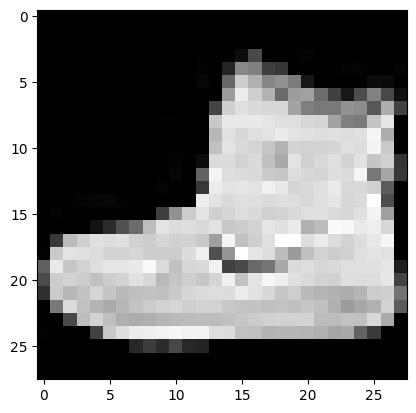

In [ ]:
plt.imshow(image.squeeze(),cmap="gray");

In [ ]:
image.shape

torch.Size([1, 28, 28])

In [ ]:
# Instead of using image, let's create a random tensor of the same shape. We can use this to test our model by chaning the shape and model
# parameters
rand_image_tensor = torch.randn(size=(1,28,28))
rand_image_tensor.shape, rand_image_tensor.unsqueeze(0).shape

(torch.Size([1, 28, 28]), torch.Size([1, 1, 28, 28]))

In [ ]:
model_2(rand_image_tensor.unsqueeze(0).to(device))
# This returns output with one probability value for each class in our dataset

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
# Pass image through model_2
model_2(image.to(device))

RuntimeError: ignored

**Note:** In the video, Daniel took an example of 1 random tensor, so gets 1x10 output.
But in the above example, I used the actual image data from FashionMNIST. Hence, I get 10x10 output

## Model 2: Breaking Down Conv2D step by Step

### 7.1 Stepping through `nn.Conv2D()`

See the documentation:
https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

We'll aim to recreate the first Conv2D layer from the CNN explainer website through code to understand what's happening in the Conv2D layer using dummy data. We'll also use colour channel first.

In [ ]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32,3,64,64)) # This creates a batch of 32 imagese of size 64*64 with 3 colour channels
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")


Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [ ]:
torch.manual_seed(42)
# Create a single Conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3, # Same as saying (3,3). Kernel is also called as filter
                       stride=1,
                       padding=0)

# Pass the data through the convolutional layer
conv_output = conv_layer(test_image)
conv_output, conv_output.shape

(tensor([[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
          [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
          [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
          ...,
          [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
          [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
          [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],
 
         [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
          [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
          [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
          ...,
          [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
          [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
          [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],
 
         [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
          [ 0.8117,  0.3191,

Few things to note:
1. The output size progressively decreases as we move towards the output layer
2. Increasing the stride from 1 to 2, halves the output size
3. Increasing padding increases the output size, padding =1 will preserve the shape

In [ ]:
torch.manual_seed(42)
# Create a single Conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3,3), # Same as saying (3,3). Kernel is also called as filter
                       stride=1,
                       padding=0)

# Pass the data through the convolutional layer
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 62, 62])

Playing with different parameters for kernel_size (3,3):

1. stride = 1, padding = 0: Output shape = (10,62,62)
2. stride = 1, padding = 1: Output shape = (10,64,64)
3. stride = 2, padding = 0: Output shape = (10,31,31)
4. stride = 2, padding = 1: Output shape = (10,32,32)

For output_channels = 64,
1. stride = 1, padding = 0: Output shape = (64,62,62)

## Model 2: Breaking Down MaxPool2D Step by Step

### 7.2 Stepping through `nn.MaxPool2d`

https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html

In [ ]:
# Note: I am skipping the unsqueeze method as it works fine with my version of Torch in Colab
print(f"The image original shape: {test_image.shape}")

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv layer
test_image_through_conv = conv_layer(test_image)
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shaper after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")


The image original shape: torch.Size([3, 64, 64])
Shape after going through conv_layer(): torch.Size([10, 62, 62])
Shaper after going through conv_layer() and max_pool_layer(): torch.Size([10, 31, 31])


In [ ]:
torch.manual_seed(42)
# Create a small random tensor with similar dimensions to our images
random_tensor = torch.randn(size=(1,1,2,2))
print(f"\nRandom tensor:\n {random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# # Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass the random tensor through max pool layer
max_pool_tensor = max_pool_layer(random_tensor)

print(f"\nMax pool tensor:\n {max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")


Random tensor:
 tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
 tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


## Model 2: Using a Trick to Find the Input and Output Shapes of Each of our layers

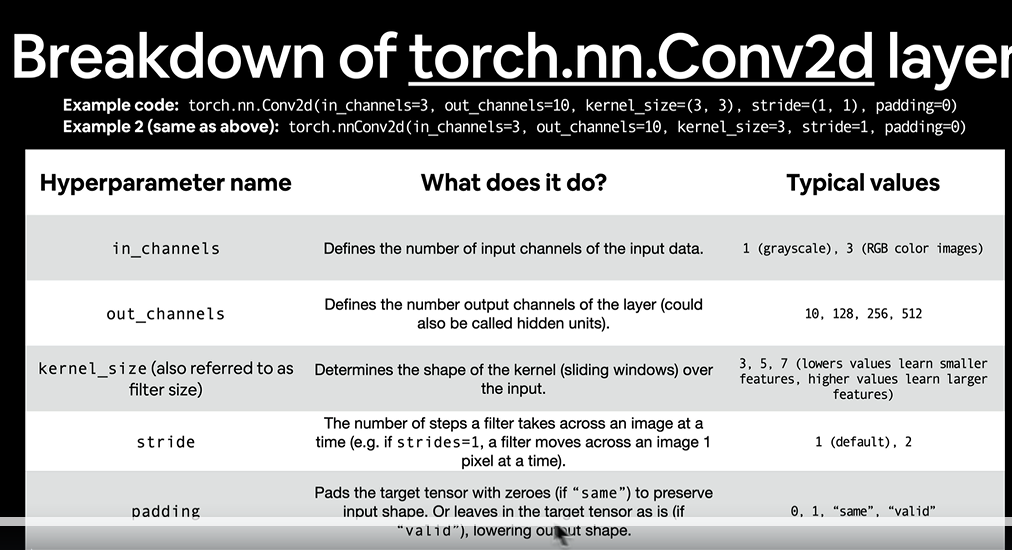

## Model 2: Setting up a Loss function and Optimizer

### 7.3 Set up a Loss function and Optimizer for `model_2`

In [ ]:
# Setup loss function/eval metrics/optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

## Model 2: Training our First CNN and Evaluation its Results

### 7.4 Training and testing `model_2` using our training and test functions

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 0.59190 | Train acc: 78.45%
Test loss: 0.38897 | Test acc: 85.93%

Epoch: 1
-------
Train loss: 0.36077 | Train acc: 86.98%
Test loss: 0.35155 | Test acc: 87.04%

Epoch: 2
-------
Train loss: 0.32239 | Train acc: 88.20%
Test loss: 0.32157 | Test acc: 88.29%

Train time on cuda: 42.558 seconds


In [ ]:
# Get model_2 results
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32156872749328613,
 'model_acc': 88.28873801916933}

## Comparing the Results of our Modelling Experiments

### 8. Compare model results and training time

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.321569,88.288738


Experiments we can try:
1. Change the number of hidden units: Say from 10 to 30
2. Turn off ReLU
3. Change kernel_size, padding, stride, max pool
4. Train for longer: Say epochs = 10

In [ ]:
# Add training time to compare results
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,44.537831
1,FashionMNISTModelV1,0.685001,75.019968,41.548838
2,FashionMNISTModelV2,0.321569,88.288738,42.557578


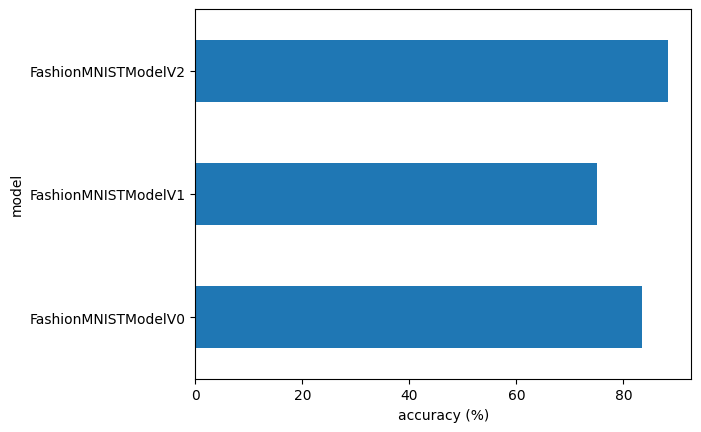

In [ ]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

## Making Predictions on Random Test Samples with the Best Trained Model

### 9. Make and evaluate random predictions with the best model

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device=device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample,dim=0).to(device)

      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)

      # Get prediction probability (logit -> prediction prob)
      pred_prob = torch.softmax(pred_logit.squeeze(),dim=0)

      # Get pred prob off GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  # Stack the pred probs to turn list into a tensor
  return torch.stack(pred_probs)


In [ ]:
import random
#random.seed(42)
test_samples = []
test_labels = []
for sample,label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape



torch.Size([1, 28, 28])

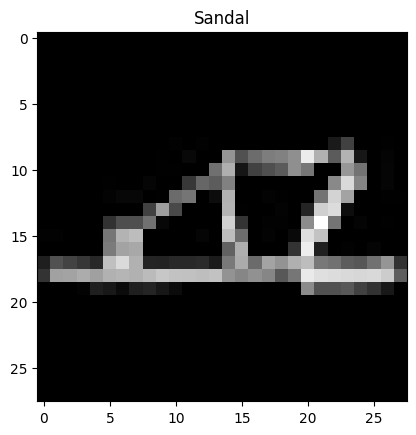

In [ ]:
plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.title(class_names[test_labels[0]]);

In [ ]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# View first two prediction probabilities
pred_probs[:2]

tensor([[1.6259e-06, 1.3948e-07, 8.0882e-07, 3.9626e-06, 1.3029e-06, 9.9994e-01,
         1.0720e-05, 3.2313e-06, 2.7470e-05, 8.2365e-06],
        [9.8553e-01, 1.2973e-03, 7.1505e-03, 4.1690e-03, 5.1256e-05, 7.0251e-06,
         8.4951e-04, 3.8540e-06, 9.4218e-04, 2.8381e-07]])

In [ ]:
# Convert prediction prob to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 0, 0, 2, 9, 9, 5, 0, 4])

## Plotting our Best Model Predictions on Random Test Samples and Evaluating Them



In [ ]:
len(test_samples)

9

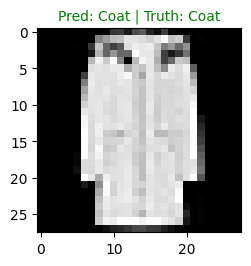

In [ ]:
# Plot predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows,ncols,1+1)

  # plot the target image
  plt.imshow(sample.squeeze(),cmap="gray")

  # Find the prediction (in text form, e.g. 'Sandal')
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form)
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between truth and pred and change colour of text
  if pred_label == truth_label:
    plt.title(title_text,fontsize=10,c='g') # green text if prediction same as truth
  else:
    plt.title(title_text,fontsize=10,c='r') #



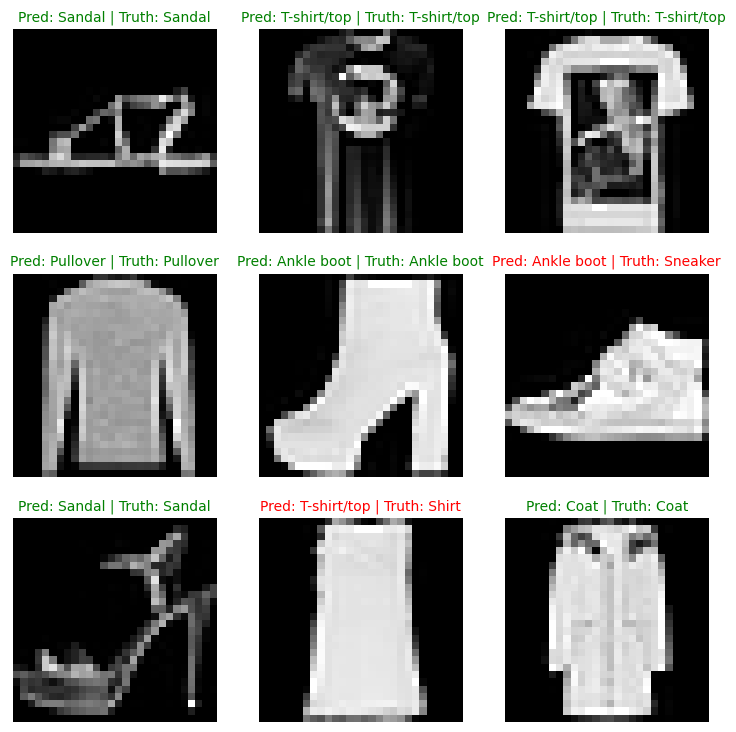

In [ ]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

## Making Predictions and Importing Libraries to Plot a Confusion Matrix

### 10. Making a confusion matrix for further prediction evaluation

A confusion matrix is a fantastic way of evaluating our classification models visually:

1. Make predictions with our trained model on the test dataset
2. Make a confusion matrix `torchmetrics.ConfusionMatrix` - https://torchmetrics.readthedocs.io/en/stable/classification/confusion_matrix.html
3. Plot the confusion matrix using `mlextend.plotting.plot_confusion_matrix()` - https://rasbt.github.io/mlxtend/user_guide/evaluate/confusion_matrix/





In [ ]:
# Import tqdm.auto
from tqdm.auto import tqdm

#. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader,desc="Making predictions..."):
    # Send the data and targets to target device
    X,y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities to prediction labels
    y_pred = torch.softmax(y_logit.squeeze(),dim=0).argmax(dim=1)
    # Put prediction on CPU for evaluation
    y_preds.append(y_pred.cpu())

# Concatenate a list of predictions into a tensor
#print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor


Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 8])

In [ ]:
len(y_pred_tensor)

10000

In [ ]:
# See if required packages are installed and if not, install them...
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 44.6 MB/s eta 0:00:00
mlxtend version: 0.22.0


In [ ]:
# Import mlxtend upgraded version
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.22.0


## Evaluating our Best Model's Predictions with a Confusion Matrix



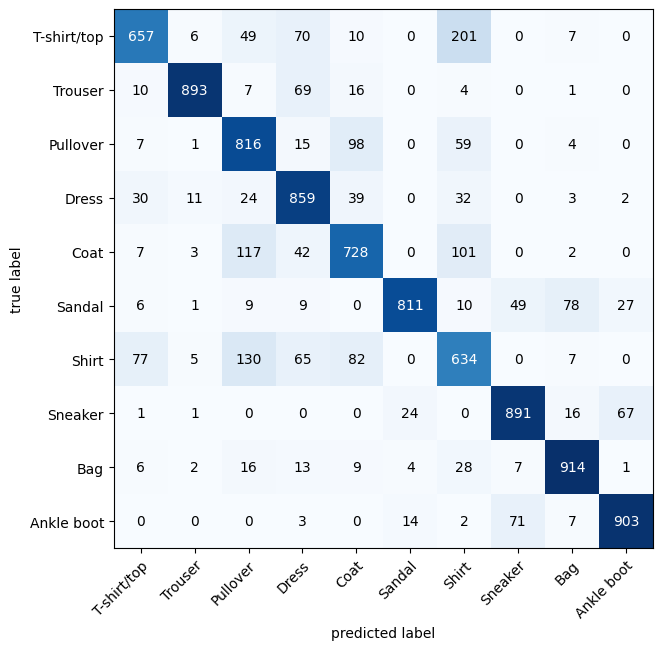

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names = class_names,
    figsize = (10,7)
)

In [ ]:
confmat_tensor

tensor([[657,   6,  49,  70,  10,   0, 201,   0,   7,   0],
        [ 10, 893,   7,  69,  16,   0,   4,   0,   1,   0],
        [  7,   1, 816,  15,  98,   0,  59,   0,   4,   0],
        [ 30,  11,  24, 859,  39,   0,  32,   0,   3,   2],
        [  7,   3, 117,  42, 728,   0, 101,   0,   2,   0],
        [  6,   1,   9,   9,   0, 811,  10,  49,  78,  27],
        [ 77,   5, 130,  65,  82,   0, 634,   0,   7,   0],
        [  1,   1,   0,   0,   0,  24,   0, 891,  16,  67],
        [  6,   2,  16,  13,   9,   4,  28,   7, 914,   1],
        [  0,   0,   0,   3,   0,  14,   2,  71,   7, 903]])

## Saving and Loading our Best Performing Model

### 11. Save and load best performing model


In [ ]:
from pathlib import Path

# Create model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create a model save path
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state_dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)


Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [ ]:
# Create a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))

# Load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send the model to target device
loaded_model_2.to(device)


FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
# Evaluate the loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32156872749328613,
 'model_acc': 88.28873801916933}

In [ ]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32156872749328613,
 'model_acc': 88.28873801916933}

In [ ]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"])
)

tensor(True)

## Recapping What we have covered plus Exercises and Extra-Curriculum